In [13]:
import numpy as np, Bio, matplotlib.pyplot as plot
from matplotlib.ticker import FormatStrFormatter
from Bio import SeqIO
import pandas as pd

%matplotlib inline

font = {'family': 'monospace',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

palette = [
    '#C8C8C8', '#145AFF', '#00DCDC', '#E60A0A', '#E6E600',
    '#00DCDC', '#E60A0A', '#EBEBEB', '#8282D2', '#0F820F', 
    '#0F820F', '#145AFF', '#E6E600', '#3232AA', '#DC9682', 
    '#FA9600', '#FA9600', '#B45AB4', '#3232AA', '#0F820F', 
    '#FFFFFF']


aa = 'ARNDCQEGHILKMFPSTWYV-'


# Pfad zur PHYLIP-Datei
fasta_file = "dataSources\TEM-1_Alignment_100_Homolgs.aln"

# Sequenzen aus der PHYLIP-Datei einlesen
sequences = SeqIO.to_dict(SeqIO.parse(fasta_file, "fasta"))

#Fata zu liste machen
msa = list(SeqIO.parse(fasta_file,'fasta'))
L = len(msa[0].seq)#286 stellen in erster spalte mit Index seq 
N = len(msa)#101 rows

#Wie oft kommt jede AS an jeder Postion vor 
-freq ein leerer Dataframe
-Consensusdatei erstellen

# Alignment of TEM-1 
- NCBI Blast:sp|P62593.1| "C:\Users\sveam\Documents\MOBI 23\Bioinfo\Alignments\Tot_Alignment_TEM.txt"
- balst search of 100 Proteins
- Search with RefSeq library 
    - This database contains NCBI RefSeq protein sequences from human, mouse, and prokaryotes, restricted to the RefSeq Select set of proteins. RefSeq Select includes one representative protein per protein-coding gene for human and mouse, and RefSeq proteins annotated on reference and representative genomes for prokaryote

## Results
- not only class A beta lactamase:
    -|WP_168837987.1|	serine hydrolase [Gammaproteobacteria]
    - 5 serine Hydrolase in total 
    - Rest only class A beta lactamase

In [14]:
freq = np.zeros([L,21])#leerer Dataframe 
display(freq)
concensus = np.zeros(L)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
for i in range(0,N):
    for j in range(0,L):
        j_aa = aa.find(msa[i].seq[j])# in der row i auf seq zugreifen und dort an stelle j Aminosäure
        freq[j,j_aa] = freq[j,j_aa] + 1 #in leerem dataframe in der row=AS=j +1
for i in range(0, L):
    concensus[i] = freq[i].argmax()#argmax gibt index des elements mit höchstem wert in array für jede position i

conservation = np.sqrt(np.sum((np.square(freq/N - 0.05)),axis=1))

Varianz = Conservation Score= √∑(p_ia/N-0.05)^2

N=100

0.05 = 1/20= Erwartete Frequency 

#Variance
Pei and Grishin (2001) propose as a conservation measure the root mean square deviation between the amino acid distribution p~ia and the average amino acid distribution over the whole alignment pa, which they name Variance:



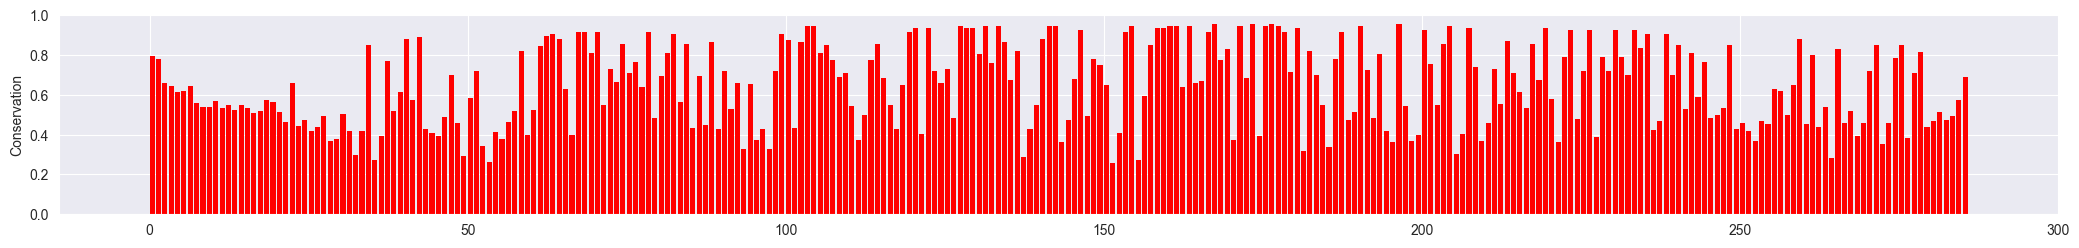

In [16]:
figure = plot.figure(figsize=(20,2))
axes = plot.axes([0,0,1,1]);
plot.close()

axes.bar(range(0,L),conservation, align='edge', linewidth = 0, color = 'red')
axes.set_ylabel('Conservation')

spacing_scale = axes.get_ylim()[1]/6
spacing = spacing_scale*2

seq_display = np.sort(np.random.randint(0,N,[5]))#Wir wählen nur 5 Alignments

figure

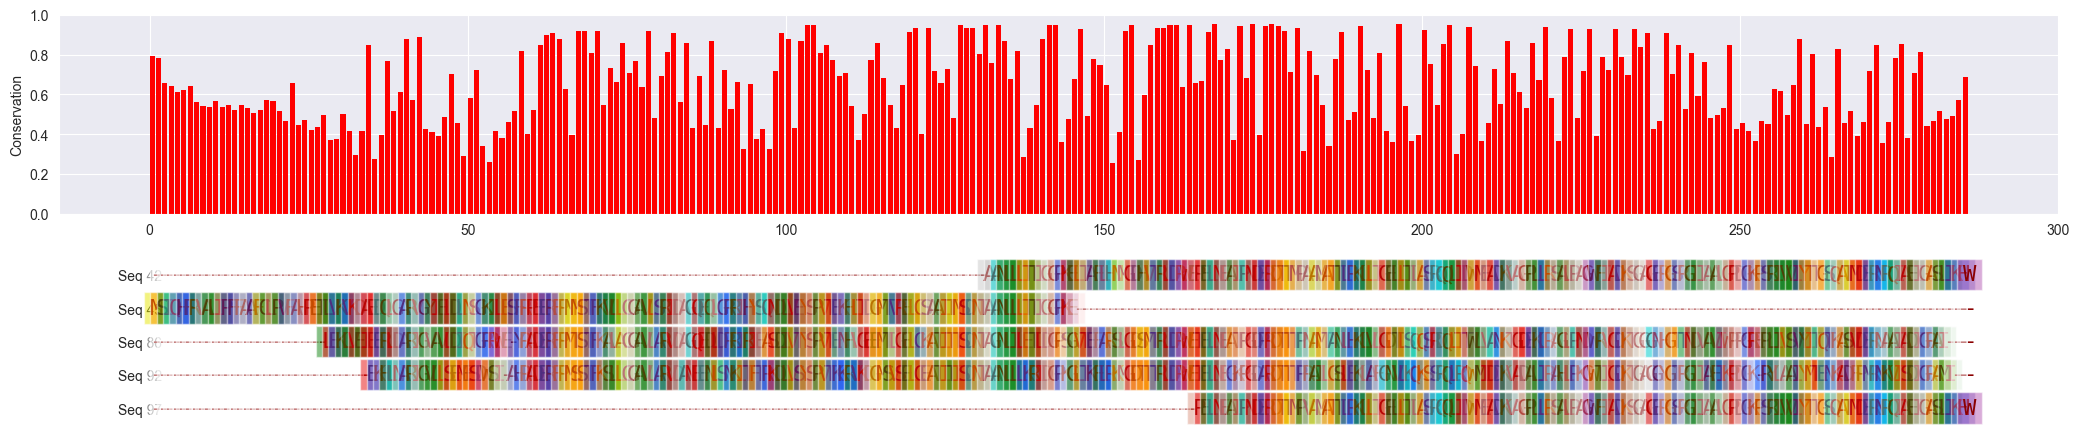

In [17]:

for j in seq_display:
    posit = -float(np.where(seq_display == j)[0]) * spacing_scale - spacing
    axes.text(-5,posit, "Seq "+(str(j+1)))
    for i in range(0, L):
        axes.text(float(i),posit, msa[j].seq[i],
            bbox=dict(facecolor=palette[aa.find(msa[j].seq[i])], 
            alpha=0.5),fontdict=font)
        
figure

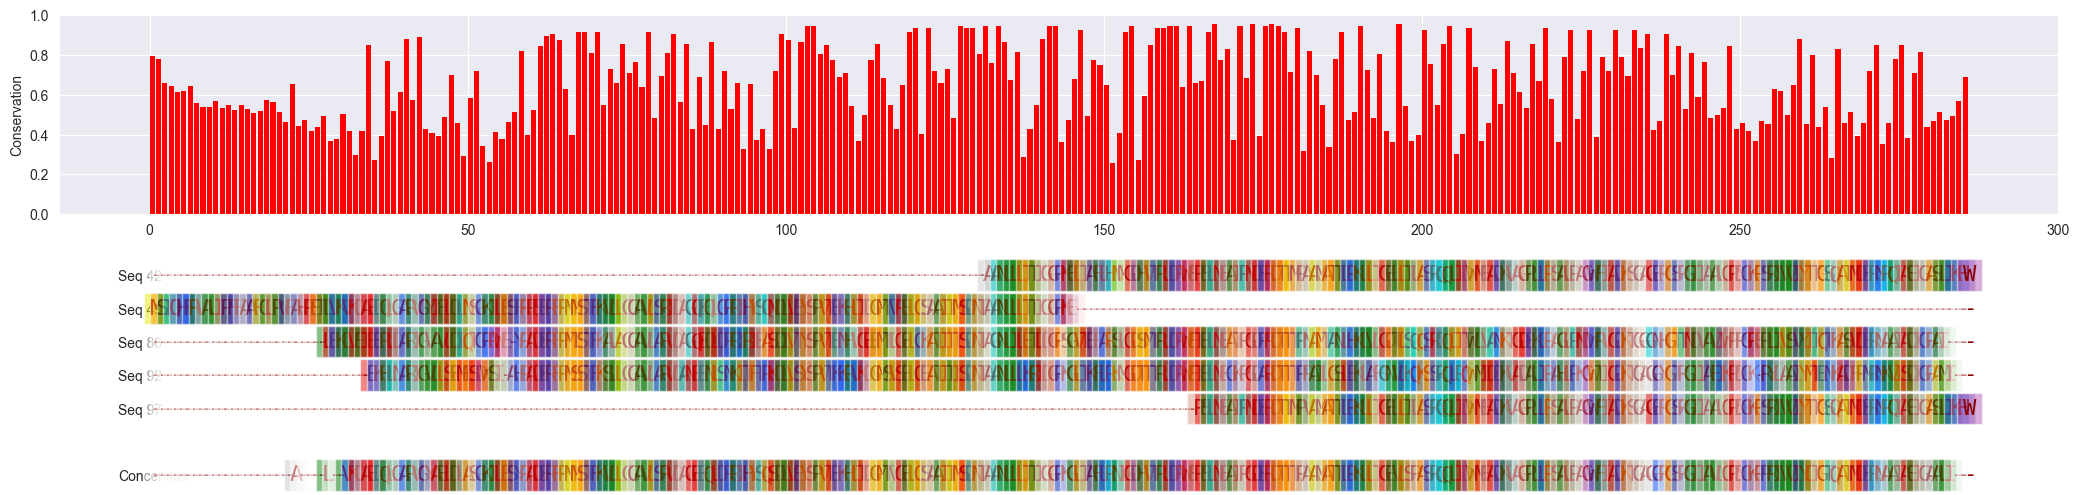

In [18]:
posit = posit - spacing
axes.text(-5,posit, "Concensus")
for i in range(0, L):
    axes.text(float(i),posit, 'ARNDCQEGHILKMFPSTWYV-'[int(concensus[i])] ,
                bbox=dict(facecolor=palette[int(concensus[i])], 
                alpha=0.5),fontdict=font)
    
figure

#Shannon entropy
The entropy for a profile column with amino acid frequencies p_ia is

E= - ∑p_ialog(p_ia)


In [19]:
display(freq)
type(freq[1][1])
np.argwhere(np.isnan(freq))
freq[0]

array([[ 0.,  0.,  0., ...,  0.,  0., 81.],
       [ 1.,  0.,  2., ...,  0.,  0., 81.],
       [ 0.,  0.,  0., ...,  0.,  1., 67.],
       ...,
       [ 4.,  5.,  1., ...,  0.,  0., 46.],
       [ 1.,  1.,  5., ...,  1.,  0., 54.],
       [ 0.,  0.,  0., ...,  0.,  0., 63.]])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 19.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., 81.])

In [20]:
#setzte positionen an denen keine AS vertretten ist (value=0, log=-inf ) auf nan um von den positionen wo eine as vertetten ist log(1)=0 zu unterscheiden 
with pd.option_context('mode.use_inf_as_na',True):
    log_nmb = np.log(freq)
    log_nmb[ log_nmb == -np.inf] = np.nan #negativ unenedlich wenn AS nicht vertretten 

# NaN-Werte ignorieren und Summe der nicht-maskierten Werte berechnen

# with np.errstate(divide="ignore"):
conservation_Shannon = np.nansum(freq.astype('float64')*log_nmb, axis=1, )
#kürze Shannon auf 263
conservation_Shannon_cut = conservation_Shannon[23:]


print(log_nmb)
display(conservation_Shannon)
len(conservation_Shannon_cut)

[[       nan        nan        nan ...        nan        nan 4.39444915]
 [0.                nan 0.69314718 ...        nan        nan 4.39444915]
 [       nan        nan        nan ...        nan 0.         4.20469262]
 ...
 [1.38629436 1.60943791 0.         ...        nan        nan 3.8286414 ]
 [0.         0.         1.60943791 ... 0.                nan 3.98898405]
 [       nan        nan        nan ...        nan        nan 4.14313473]]


C:\Users\Christoph Luh\AppData\Local\Temp\ipykernel_2716\971809425.py:3: RuntimeWarning: divide by zero encountered in log
  log_nmb = np.log(freq)


array([411.89472213, 387.15555569, 357.28099921, 348.44447527,
       339.57966177, 356.82897889, 365.72755449, 334.21601472,
       308.11249322, 318.00478936, 336.48304153, 321.15811422,
       340.66982259, 319.1323697 , 325.31920292, 321.12569227,
       312.84957601, 318.79493955, 337.8763779 , 346.8186192 ,
       325.10975936, 285.09498041, 383.52122452, 285.12956422,
       302.56920429, 280.18366786, 287.016947  , 313.5851954 ,
       268.64927595, 273.90962709, 321.80722   , 274.94130546,
       239.41028998, 281.38232693, 418.41778497, 242.68138763,
       278.72908772, 383.81529038, 296.07208   , 361.96575977,
       430.26323629, 342.91068307, 435.77957028, 290.86638158,
       275.69272341, 279.42758802, 285.12526434, 359.50160333,
       284.95647308, 237.06718947, 327.9885417 , 363.27642634,
       257.02833676, 223.00545232, 282.10294614, 264.40421598,
       313.77300675, 320.64007113, 400.32931472, 282.26831224,
       312.63865469, 411.34787022, 432.28230968, 437.82

263

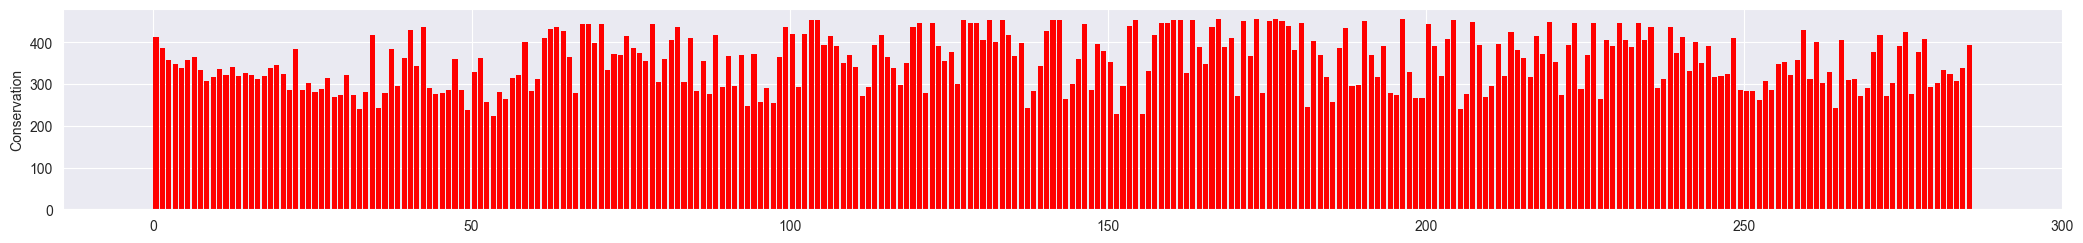

In [21]:
figure = plot.figure(figsize=(20,2))
axes = plot.axes([0,0,1,1]);
plot.close()

axes.bar(range(0,L),conservation_Shannon, align='edge', linewidth = 0, color = 'red')
axes.set_ylabel('Conservation')

spacing_scale = axes.get_ylim()[1]/6
spacing = spacing_scale*2

seq_display = np.sort(np.random.randint(0,N,[5]))#Wir wählen nur 5 Alignments

figure

Conservation Vergleich mit DMS Mean Scores 

In [22]:

conservation.shape

# löschen der ersten 23 Werte
conservation_core_V = conservation[23:]
len(conservation_core_V)
#len(conservation)
type(conservation_core_V)
print(conservation_core_V)


[0.445044   0.47135914 0.41988283 0.43905644 0.4950943  0.36972642
 0.37655699 0.50373106 0.41660144 0.29809257 0.41589492 0.84966721
 0.27446511 0.39411071 0.76989048 0.51793181 0.61245867 0.87881829
 0.57446672 0.88891112 0.42705904 0.40948136 0.39111449 0.48811505
 0.7013964  0.45742708 0.29345247 0.58394462 0.72015343 0.34161321
 0.26241406 0.41424168 0.37966812 0.46126847 0.51584562 0.81780335
 0.39930001 0.52301717 0.84677795 0.89670685 0.90681679 0.87714349
 0.62841675 0.39659027 0.91692216 0.91692216 0.80779292 0.91692216
 0.54684061 0.73055974 0.66140189 0.85690495 0.70862684 0.76657277
 0.63847589 0.91692216 0.48286516 0.69295986 0.81094201 0.90681679
 0.56274327 0.85587474 0.43048846 0.6916855  0.44789835 0.86623493
 0.42911998 0.72096971 0.52675245 0.6600666  0.32725019 0.65304911
 0.37420667 0.42682943 0.32635029 0.71933623 0.90616794 0.87580134
 0.43275964 0.86680058 0.94596966 0.94596966 0.80706447 0.84805043
 0.772179   0.69012476 0.70696484 0.54234046 0.37025632 0.4998

In [23]:
import pandas as pd
df_mean = pd.read_pickle('position_means.pkl')

df_mean_z = df_mean[['mean_Stiffler_z', 'mean_Deng_z', 'mean_Firnberg_z', 'mean_all_z']].copy()
display(df_mean_z)
len(df_mean_z)

,mean_Stiffler_z,mean_Deng_z,mean_Firnberg_z,mean_all_z
Position,,,,
24,0.786898,0.089304,0.8918,0.577701
25,0.89939,0.180497,0.49345,0.510811
26,0.998662,0.670128,0.906685,0.849455
27,-0.510157,-0.255614,-0.514142,-0.426638
28,0.377421,0.132612,0.090621,0.20849
...,...,...,...,...
282,-0.337803,0.463454,-0.376808,-0.083719
283,-0.106276,0.31609,-0.152312,0.019167
284,0.824699,0.420258,0.974941,0.73577


263

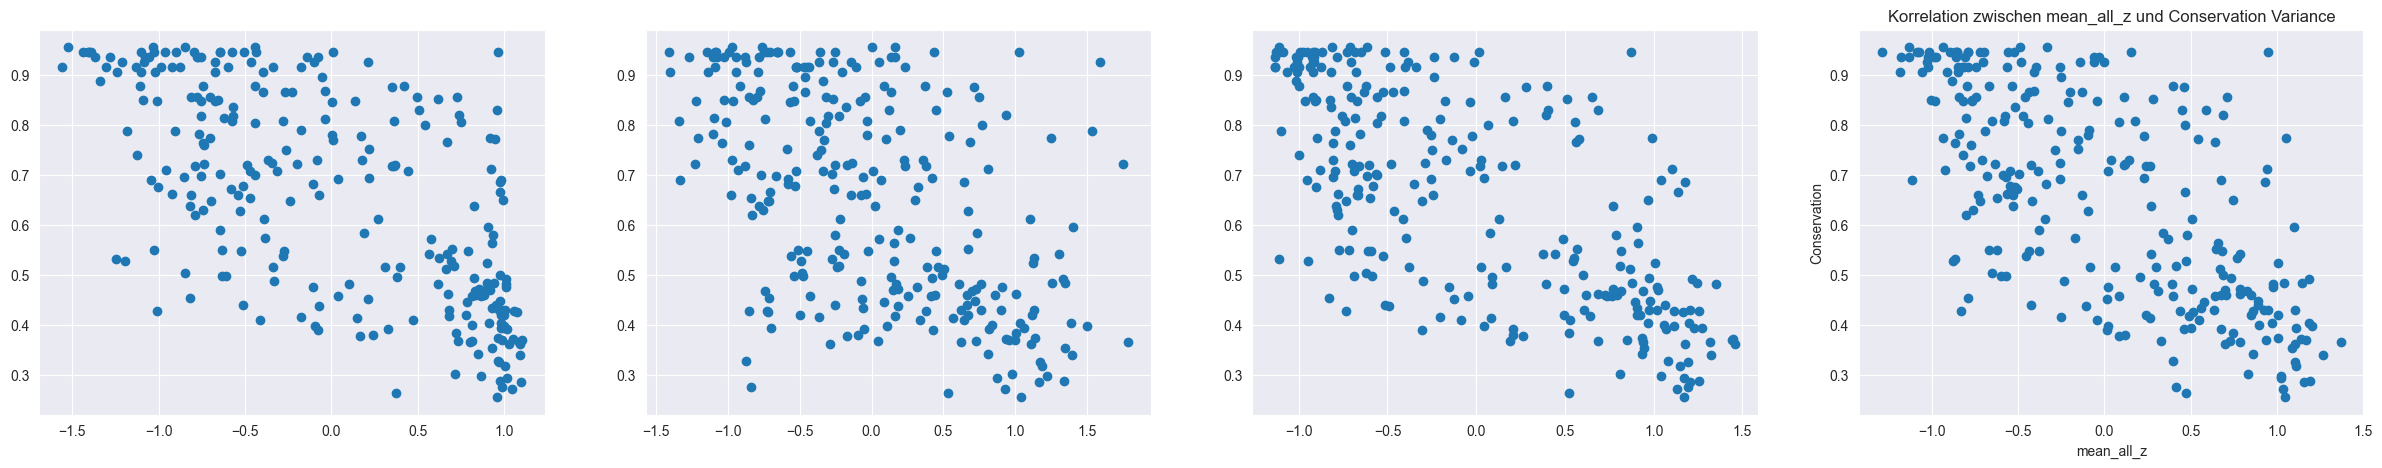

In [24]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 4, figsize=(30, 5))

for i, col in enumerate(df_mean_z.columns):
    axs[i].scatter(df_mean_z[col], conservation_core_V)
    plt.title(f'Korrelation zwischen {col} und Conservation Variance')
plt.xlabel(col)
plt.ylabel('Conservation')
   
plt.show()

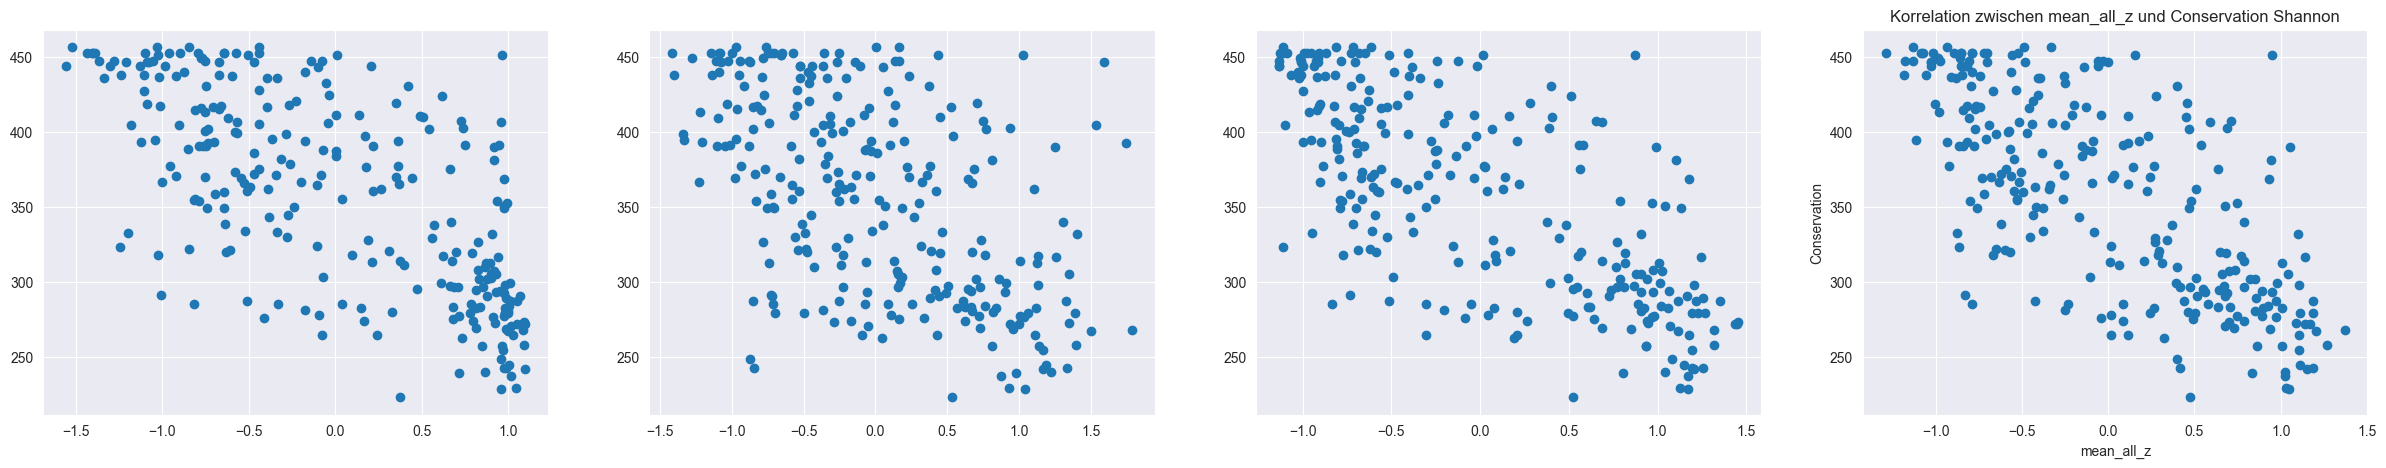

In [25]:

fig, axs = plt.subplots(1, 4, figsize=(30, 5))
for i, col in enumerate(df_mean_z.columns):
    axs[i].scatter(df_mean_z[col], conservation_Shannon_cut)
    plt.title(f'Korrelation zwischen {col} und Conservation Variance')
    plt.xlabel(col)
    plt.ylabel('Conservation')
    plt.title(f'Korrelation zwischen {col} und Conservation Shannon')
plt.show()

In [26]:
print(conservation_Shannon_cut)
print(conservation_core_V)


[285.12956422 302.56920429 280.18366786 287.016947   313.5851954
 268.64927595 273.90962709 321.80722    274.94130546 239.41028998
 281.38232693 418.41778497 242.68138763 278.72908772 383.81529038
 296.07208    361.96575977 430.26323629 342.91068307 435.77957028
 290.86638158 275.69272341 279.42758802 285.12526434 359.50160333
 284.95647308 237.06718947 327.9885417  363.27642634 257.02833676
 223.00545232 282.10294614 264.40421598 313.77300675 320.64007113
 400.32931472 282.26831224 312.63865469 411.34787022 432.28230968
 437.82026635 426.78394935 365.64166123 277.54822811 443.36886152
 443.36886152 398.37185596 443.36886152 333.85441394 371.0043383
 370.09207621 415.78437117 385.51719505 375.1756312  354.21029128
 443.36886152 305.10102521 360.49411469 405.96501885 437.82026635
 305.21649302 410.30841519 284.03565193 355.15029238 277.03770793
 417.71219112 293.35190396 366.22767544 296.36103338 369.20286884
 248.47562918 371.76941914 256.97055271 289.33644239 254.43380733
 365.1298627

Genauere scatter plots? 
Wir würden hohe conservation bei niedrigem fitness erwarten und geringe conservation bei hoher fitness 

In [27]:
#Dataframe erweitern um Conservation scores

df_DMS_Conserv = df_mean_z.copy()
df_DMS_Conserv['Conserved'] = conservation_core_V
df_DMS_Conserv_S = df_DMS_Conserv.copy()
df_DMS_Conserv_S['Conserved_Shannon'] = conservation_Shannon_cut


In [28]:
#z normalisierung der Shannon conservation 
df_DMS_Conserv_S_Norm = df_DMS_Conserv_S.copy()

def z_score(column):
    mean = column.mean()
    std = column.std()
    z_scores = (column - mean) / std
    return z_scores


df_DMS_Conserv_S_Norm['Conserved_Shannon'] = z_score(df_DMS_Conserv_S['Conserved_Shannon'])

# min max mean checken 
max =df_DMS_Conserv_S_Norm.max()
min = df_DMS_Conserv_S_Norm.min()
mean = df_DMS_Conserv_S_Norm.mean()
print(max)
print(min)
print(mean)

mean_Stiffler_z      1.100456
mean_Deng_z          1.784508
mean_Firnberg_z       1.45559
mean_all_z           1.373021
Conserved            0.955866
Conserved_Shannon    1.498153
dtype: object
mean_Stiffler_z     -1.558302
mean_Deng_z         -1.411927
mean_Firnberg_z     -1.133084
mean_all_z          -1.290478
Conserved            0.255218
Conserved_Shannon    -2.02082
dtype: object
mean_Stiffler_z      0.003519
mean_Deng_z         -0.007627
mean_Firnberg_z     -0.014748
mean_all_z          -0.005229
Conserved            0.652388
Conserved_Shannon         0.0
dtype: object


<Axes: xlabel='Position'>

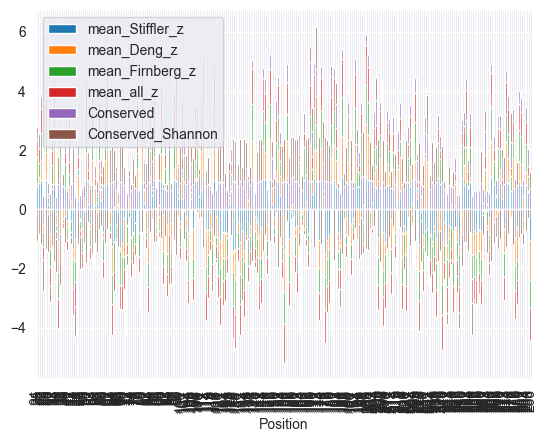

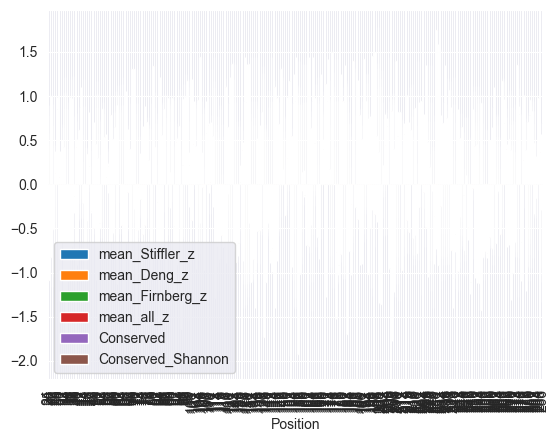

In [29]:
#Kurze Übersicht

figsize = (150,100)
df_DMS_Conserv_S_Norm.plot(kind = 'bar', stacked = True, width= 1)
df_DMS_Conserv_S_Norm.plot(kind = 'bar')

[[1.         0.99118175]
 [0.99118175 1.        ]]


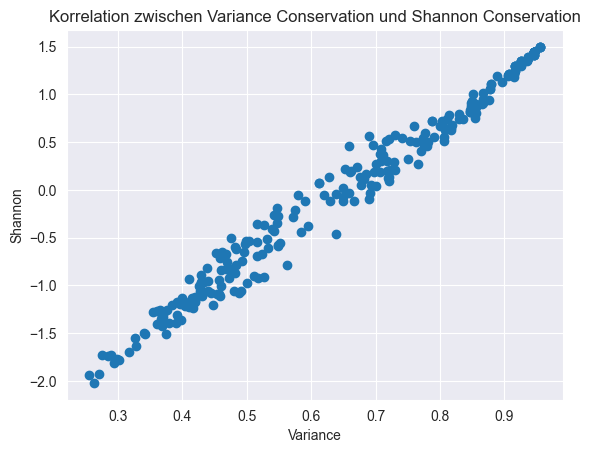

In [30]:
#Vergeich der Conserved methods
corr = np.corrcoef(conservation_core_V, z_score(df_DMS_Conserv_S['Conserved_Shannon']))
print(corr)

plt.scatter(conservation_core_V, z_score(df_DMS_Conserv_S['Conserved_Shannon']))
plt.xlabel('Variance')
plt.ylabel('Shannon')
plt.title('Korrelation zwischen Variance Conservation und Shannon Conservation')
plt.show()

In [31]:
Shannon_Cons =  z_score(df_DMS_Conserv_S['Conserved_Shannon'])
Variance_Cons = conservation_core_V
# print(Shannon_Cons)
# type(Shannon_Cons)
# Shannon_Cons.to_csv('Shanon.csv')


In [32]:

#Korrelation
# cor_df = pd.DataFrame(columns =['Conservation', 'Korrelation'])

# for col in df_DMS_Conserv_S_Norm.columns:
#     print(df_DMS_Conserv_S_Norm[col])
#     cor_S = np.corrcoef(df_DMS_Conserv_S_Norm[col], Shannon_Cons)
#     cor_V = np.corrcoef(df_DMS_Conserv_S_Norm[col],df_DMS_Conserv_S_Norm['Conserved'])
#     cor_df = cor_df.append({'conservation': cor_v, 'Korrelation': cor_S}, ignore_index=True)    
# return cor_df
    
# print(cor_df)

In [33]:
# Data Frame neu einlesen

C_df_New: pd.DataFrame = pd.read_csv('df_DMS_Conserved_Index.csv', delimiter = ',')
display(C_df_New)

,Position,mean_Stiffler_z,mean_Deng_z,mean_Firnberg_z,mean_all_z,Conserved,Conserved_Shannon
0,24,0.786898,0.089304,0.891800,0.577701,0.445044,-1.083764
1,25,0.899390,0.180497,0.493450,0.510811,0.471359,-0.820711
2,26,0.998662,0.670128,0.906685,0.849455,0.419883,-1.158366
3,27,-0.510157,-0.255614,-0.514142,-0.426638,0.439056,-1.055295
4,28,0.377421,0.132612,0.090621,0.208490,0.495094,-0.654550
...,...,...,...,...,...,...,...
258,282,-0.337803,0.463454,-0.376808,-0.083719,0.515465,-0.358021
259,283,-0.106276,0.316090,-0.152312,0.019167,0.475500,-0.503238
260,284,0.824699,0.420258,0.974941,0.735770,0.492911,-0.743719
261,285,0.574070,0.050248,0.486125,0.368077,0.571215,-0.287563


In [34]:
#Korrelation
cor_df = pd.DataFrame(columns =['Shannon', 'Var'])

for col in C_df_New.columns:
    if col == 'Position':
        continue
    else:

        cor_v = C_df_New[col].corr(C_df_New['Conserved'])
        
        cor_S = C_df_New[col].corr(Shannon_Cons)
    
        cor_df = cor_df.append({'Var': cor_v, 'Shannon': cor_S}, ignore_index=True)    

cor_df = cor_df.rename(index={0: 'Stiffler', 1: 'Deng', 2: 'Firnberg', 3: 'Mean', 4 :'variance', 5 : 'Shannon'})
display(cor_df)

#

AttributeError: 'DataFrame' object has no attribute 'append'

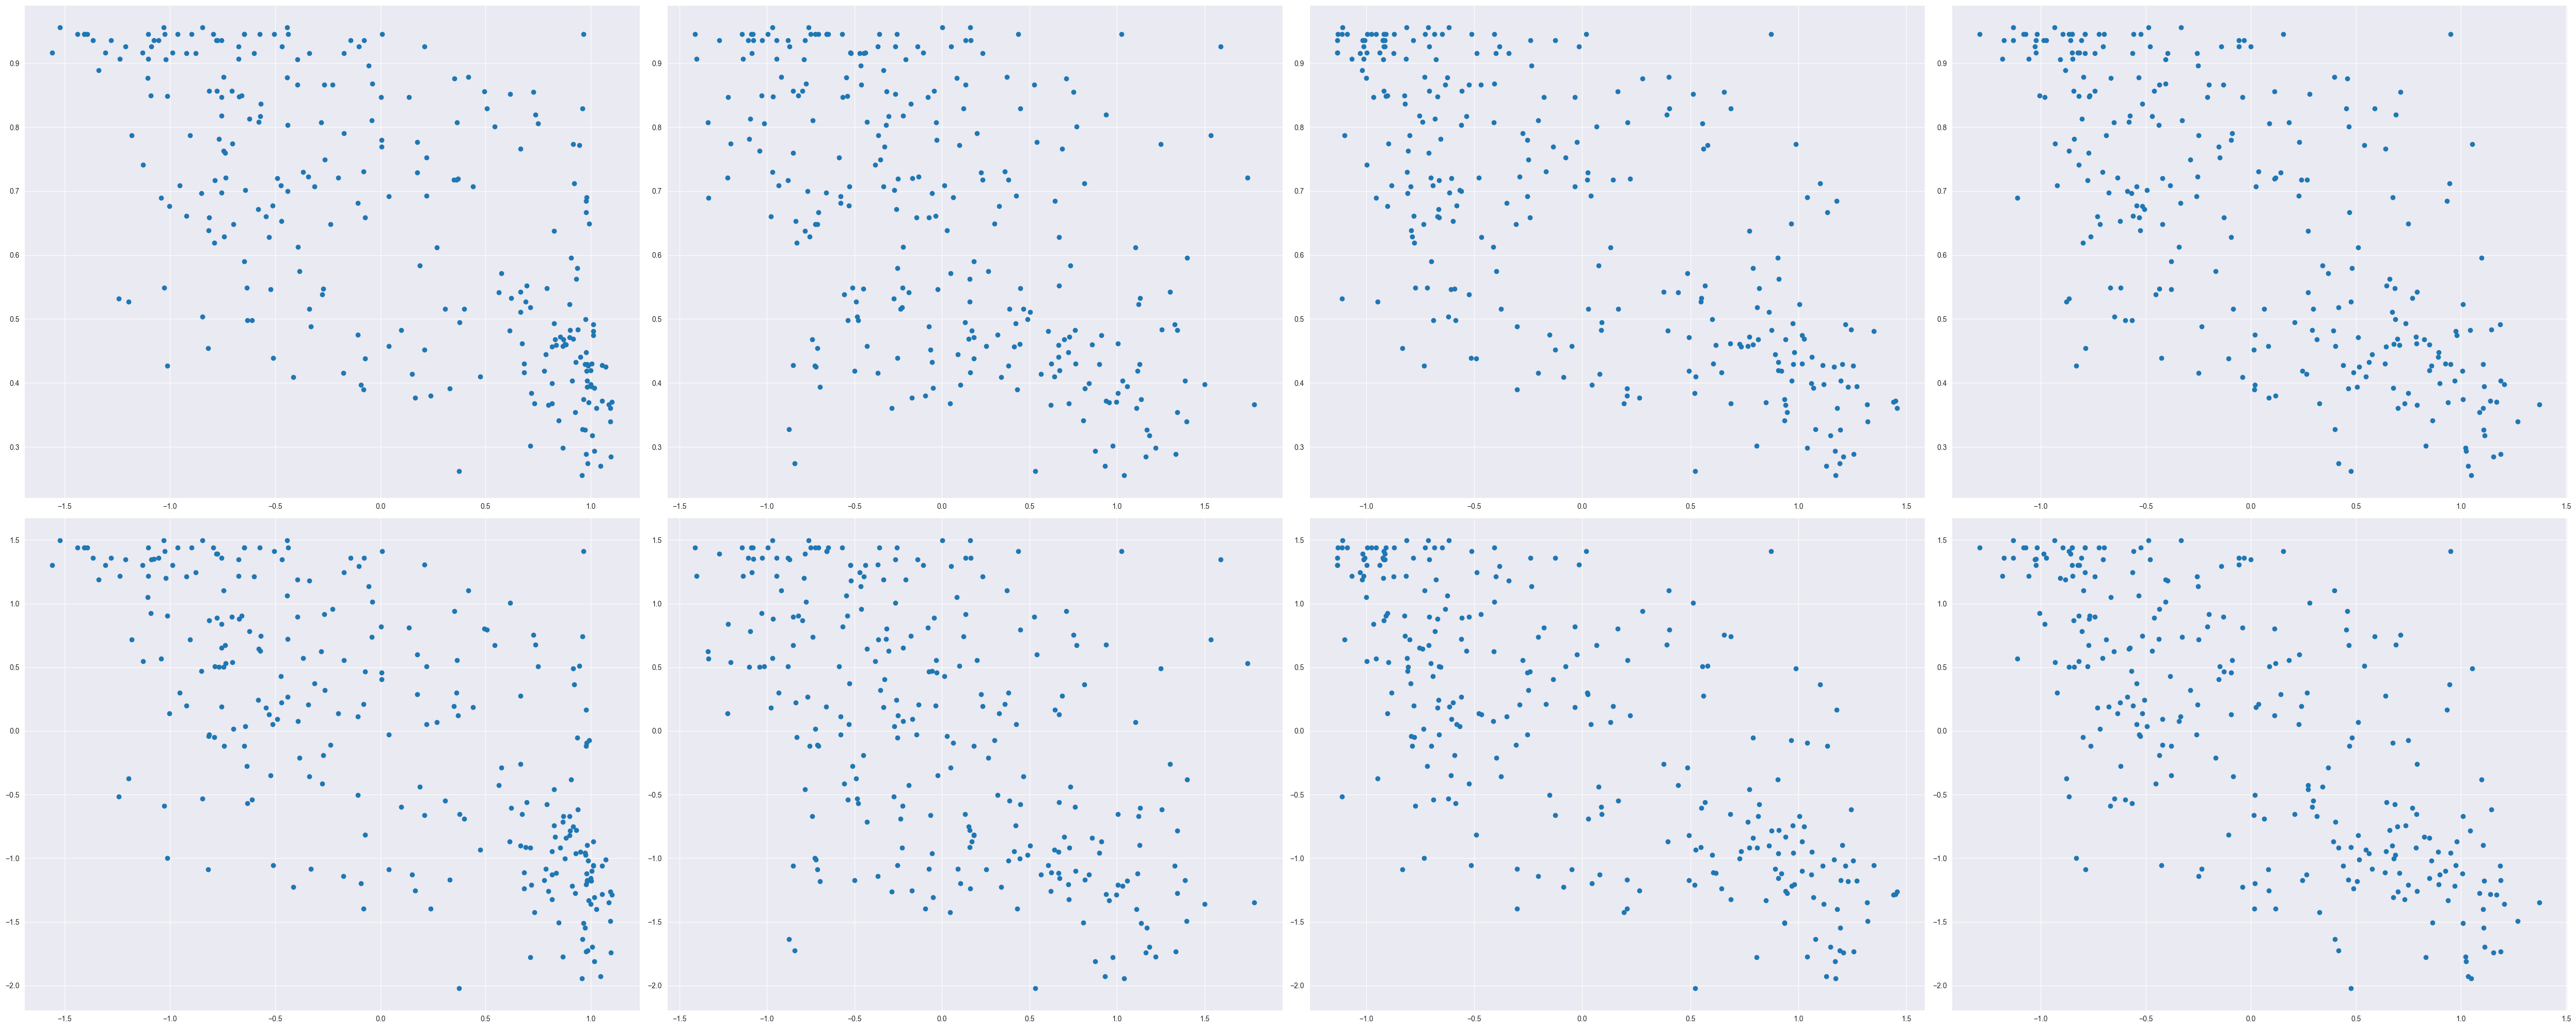

In [36]:
fig, axs = plt.subplots(2, 4, figsize=(50, 20))

for i, col in enumerate(C_df_New.columns):
    if col == 'Position' or col == 'Conserved' or col =='Conserved_Shannon':
        continue
    else:
        axs[0,i-1].scatter(C_df_New[col], C_df_New['Conserved'])
        axs[1,i-1].scatter(C_df_New[col], C_df_New['Conserved_Shannon'])

        
    
plt.tight_layout()
plt.show()

## Calculation of concensus matrix:
- score should be a quantification of probability of replacement of AS X with Y

1. Identity matrix – Exact matches receive one score and non-exact
matches a different score (1 on the diagonal 0 everywhere else)
2. Mutation data matrix – a scoring matrix compiled based on
observation of protein mutation rates: some mutations are
observed more often then other (PAM, BLOSUM).
3. Physical properties matrix – amino acids with with similar
biophysical properties receive high score.
4. Genetic code matrix – amino acids are scored based on
similarities in the coding triple. 
5. Take the most frequent amino acids in the Alignment

### PAM Point Accepted Mutation /Percent Accepted Mutation
Two sequences S and T are defined to be 1 PAM unit
diverged if a series of accepted point mutation (and no
insertion/deletion) can convert S to T with an average of
one mutation per 100 res. 

### BLOSUM
Block Substitution Matrix (Henikoff, Henikoff 1992)
Block – a short contiguous interval of multiple aligned sequences
BLOCKS – data base of of highly conserved aligned sequences
representing hundredths of protein groups.
http://blocks.fhcrc.org/blocks/ (http://blocks.fhcrc.org/blocks/)

Choose a percent threshold say 80%
BLOSUM62 – most similar to PAM250 (believed to be better) 

### Our approach
Try, 1,2,5 with PAM250,PAM460 and Blosum62

In [35]:
#Consensus = am häufigsten vorkommende AS in Sequenz 
#Übersetze Zahlencode in Buchstabencode der Sequenz 

aa = 'ARNDCQEGHILKMFPSTWYV-'
concensusseq = []
for z,i in enumerate(concensus):
    letter = aa[int(i)]
    # print(letter)    
    concensusseq.append(letter)

print(concensusseq)




['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'A', '-', '-', '-', '-', 'L', '-', '-', 'V', 'K', 'D', 'A', 'E', 'D', 'Q', 'L', 'G', 'A', 'R', 'V', 'G', 'Y', 'A', 'E', 'L', 'D', 'L', 'A', 'S', 'G', 'K', 'I', 'L', 'E', 'S', 'Y', 'R', 'A', 'D', 'E', 'R', 'F', 'P', 'M', 'M', 'S', 'T', 'F', 'K', 'V', 'L', 'L', 'C', 'G', 'A', 'V', 'L', 'S', 'R', 'V', 'D', 'A', 'G', 'E', 'E', 'Q', 'L', 'D', 'R', 'R', 'I', 'H', 'Y', 'S', 'Q', 'S', 'D', 'L', 'V', 'E', 'Y', 'S', 'P', 'V', 'T', 'E', 'K', 'H', 'L', 'T', 'D', 'G', 'M', 'T', 'V', 'G', 'E', 'L', 'C', 'S', 'A', 'A', 'I', 'T', 'M', 'S', 'D', 'N', 'T', 'A', 'A', 'N', 'L', 'L', 'L', 'T', 'T', 'I', 'G', 'G', 'P', 'K', 'G', 'L', 'T', 'A', 'F', 'L', 'R', 'N', 'I', 'G', 'D', 'H', 'V', 'T', 'R', 'L', 'D', 'R', 'W', 'E', 'P', 'E', 'L', 'N', 'E', 'A', 'I', 'P', 'G', 'D', 'E', 'R', 'D', 'T', 'T', 'T', 'P', 'A', 'A', 'M', 'A', 'T', 'T', 'L', 'R', 'K', 'L', 'L', 'T', 'G', 'E', 'V', 'L', 'S', 'P', 'A',

# Alignment Concensus (5.)

In [37]:
from Bio import Align
from Bio import pairwise2
aligner = Align.PairwiseAligner()
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
Concensus_Calc = ''.join(concensusseq)
#score = aligner.score(Concensus_Calc,msa[0].seq)
score = pairwise2.align.globalxx(Concensus_Calc,msa[0].seq, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(Concensus_Calc,msa[0].seq, score, 23,286, full_sequences= False ) 

print(seq_Conc_Calc)


 2 ----L--VKDAEDQLGARVGYAELDLASGKILESYRADERFPMMSTFKVLLCGAVLSRVDAGEEQLDRRIHYSQSDLVEYSPVTEKHLTDGMTVGELCSAAITMSDNTAANLLLTTIGGPKGLTAFLRNIGDHVTRLDRWEPELNEAIPGDERDTTTPAAMATTLRKLLTGEVLSPASRQQLIDWMEADKVAGPLLRSALPAGWFIADKTGAGGRGSRGIIAVLGPDGKPPRIVVIYLTGTQATMDERNAAIAEIGAALI---
       |  ||||||||||||||.||||.|||||||.|..||||||||||||||||||||||||.|||.|||||||.|||||||||||||||||||.||||||||||||||||||||||||||.|||||.|.|||||||||||||||||||.||||||.|||||||||||||||.|..|||||||||||||||||||||||||||||||||.|||.||||||||.|||||||.||||||.||.||||||||..||||||.||   
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLTLASRQQLIDWMEADKVAGPLLRSALPAGWFIADKSGAGERGSRGIIAALGPDGKPSRIVVIYTTGSQATMDERNRQIAEIGASLIKHW
  Score=229



C:\Users\Christoph Luh\PycharmProjects\topic02_team01\venv\lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


80% conserved

In [38]:
#EMBOSS Concensussequnez zur überprüfung PAM460
with open("emboss_cons-I20230625-175340-0830-54160326-p1m.txt", "r") as file:
    Conc_E = file.read()
    seq_Conc_E = Conc_E.replace("x", "-")
    seq_Conc_E = seq_Conc_E[12:]

print(seq_Conc_E)
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalxx(seq_Conc_E.strip(),msa[0].seq.strip(), score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_E,msa[0].seq, score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score)



----------------------A--E-L--LKD-EDRLGGRLG---LDLDGGR--DGYRPDERFPL-STFKVLLCGTLLSRVDDGEEDLDRRIHY-EDDLVEYSPVTEKHLGDGLSLGELCDAALTLSDNTAGNLLLD-LGGPKGLTEFLRDLGDHITRLDRWEPELNEGLPGDERDTT-PDAMT-SLRRLLLGDLLTPDSRDHLVDWL-DDRVGGPLLRAGLPDGWFIGDRSGGGDHGSRGVIGLL-PDGRPPWLV-LYLTGSDASLDERDKELAELG-ALI---

 2 --E-L--LKD-EDRLGGRLG---LDLDGGR--DGYRPDERFPL-STFKVLLCGTLLSRVDDGEEDLDRRIHY-EDDLVEYSPVTEKHLGDGLSLGELCDAALTLSDNTAGNLLLD-LGGPKGLTEFLRDLGDHITRLDRWEPELNEGLPGDERDTT-PDAMT-SLRRLLLGDLLTPDSRDHLVDWL-DDRVGGPLLRAGLPDGWFIGDRSGGGDHGSRGVIGLL-PDGRPPWLV-LYLTGSDASLDERDKELAELG-ALI---
     | |  .|| ||.||.|.|   |||..|.  ...||.||||. |||||||||..|||||.|.|.|.||||| ..|||||||||||||.||....|||.||.|.|||||.||||. .||||.||.||...|||.||||||||||||..|.|||||| |.||. .||.||.|.|||..||..|.||. .|.|.|||||..||.||||.|.||.|..||||.|..| |||.|...| .|.|||.|..|||....||.| .||   
24 HPETLVKVKDAEDQLGARVGYIELDLNSGKILESFRPEERFPMMSTFKVLLCGAVLSRVDAGQEQLGRRIHYSQNDLVEYSPVTEKHLTDGMTVRELCSAAITMSDNTAANLLLTTIGGPKELTAFLHNMGDHVTRLDRWEPELNEAIPNDERDTTMPAAMATTLRKLLTGELLT

56% conserved 

In [39]:
#EMBOSS CONCENSUS EBLOSUM62
with open("dataSources\emboss_cons_blosum62.txt", "r") as file:
    Conc_E62 = file.read()
    seq_Conc_E62 = Conc_E62.replace("x", "-")
    seq_Conc_E62 = seq_Conc_E62[11:]
print(seq_Conc_E62)

aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalxx(seq_Conc_E62.strip(),msa[0].seq.strip(), score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_E62,msa[0].seq, score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score)


FileNotFoundError: [Errno 2] No such file or directory: 'dataSources\\emboss_cons_blosum62.txt'

In [40]:
#Vergleiche Concensussequenzen PAM460 mit Blosum62
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalxx(seq_Conc_E62,seq_Conc_E, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_E62,seq_Conc_E, score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score)


NameError: name 'seq_Conc_E62' is not defined

PAM460 & Blossum62 sind nicht identisch

In [41]:
#EMBOSS CONCENSUS PAM250
with open("dataSources\emboss_cons-PAM250.txt", "r") as file:
    Conc_PAM250 = file.read()
    seq_Conc_PAM250 = Conc_PAM250.replace("x", "-")
    seq_Conc_PAM250 = seq_Conc_PAM250[11:]
print(seq_Conc_PAM250)

aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalxx(seq_Conc_PAM250,msa[0].seq, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_PAM250,msa[0].seq, score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score)

FileNotFoundError: [Errno 2] No such file or directory: 'dataSources\\emboss_cons-PAM250.txt'

In [42]:
#Vergleiche Concensussequenzen PAM250 mit Blosum62
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = pairwise2.align.globalxx(seq_Conc_PAM250,seq_Conc_E, score_only=True)
seq_Conc_Calc = Bio.pairwise2.format_alignment(seq_Conc_PAM250,seq_Conc_E, score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc)
print(score)

NameError: name 'seq_Conc_PAM250' is not defined

In [43]:
#Überprüfung gleicher sequenz von TEM1 = 100% Übereinstimmung 
with open("dataSources\Tem1.txt", "r") as file:
    TEM= file.read()
    TEM_S = TEM[84:]#Überschrift nicht mit alignen

print(TEM_S)

score = pairwise2.align.globalxx(TEM_S.strip(),msa[0].seq.strip(), score_only=True)#strip muss verwendet werden eil siehe unten
seq_Conc_Calc_T = Bio.pairwise2.format_alignment(TEM_S.strip(),str(msa[0].seq.strip()), score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc_T)


FileNotFoundError: [Errno 2] No such file or directory: 'dataSources\\Tem1.txt'

In [44]:

print(TEM_S.strip()[:24])
print(msa[0].seq.strip()[:24])
#aufgrund verschiedener typen wird hier code verschoben? 


NameError: name 'TEM_S' is not defined

## Results
1. High similarity of the TEM 1 to the 5.Concensus Sequence:
- tells us that blast did it's job and delivered too similar sequences, which are not based on evolution but on fluke?
- our alignment with 100 AS is too small
2. Blosum and PAM250 
- give highly similar Concensus Values with 62% Conservation across the bigger 'database'
- PAM250 & Blosum62 are not identical but similar 
    - 100% = 288 
    
    - 75% = 215 
3. Continue with Blosum62 anyway?
- gives us the best assessment for conserved regions 

# Why Biopython Alignemnt results might be incorrect:
- It looks like there are parts one amino acid shifted
- Percentage of identity/conservation is to high in all alignemnts 
   - 100/288 * 197 = 68% (for Blosum62, PAM250)
   - 56% (for PAM46)
- try to align Blosum62 Sequence & TEM1 sequences in EMBOSS gives Alignment
- figgure out if we can adapt the alignment scores so that it matchs better 


In [45]:
from Bio import AlignIO
dict = {}
Needle = r'dataSources\Needle-Align-62-Tem.txt'

sequences = AlignIO.read(Needle, "emboss")
for i, record in enumerate(sequences):
    key = i
    dict[key] = record.seq
#print(sequences)
print(dict)
#0 ist TEM, 1 Concensus

FileNotFoundError: [Errno 2] No such file or directory: 'dataSources\\Needle-Align-62-Tem.txt'

In [46]:
score = pairwise2.align.globalxx(dict[0].strip(),dict[1].strip(), score_only=True)#strip muss verwendet werden eil siehe unten
seq_Conc_Calc_T = Bio.pairwise2.format_alignment(dict[0].strip(),dict[1].strip(), score, 23,286, full_sequences= False ) 
print(seq_Conc_Calc_T)

len(dict[0])


KeyError: 0

- Alignment von Emboss ist um einiges besser 
- Aber Score ist ok 308 AS = 100% , 217 = 67% 

In [47]:
#kurzer check ob ich Werte richtig ausgerechnet habe, da sequenzen unterschiedliche Länge haben 
dict = {'Calc' : len(concensus), 'PAM46' : len(seq_Conc_E),'Bl62': len(seq_Conc_E62), 'PAM250' : len(seq_Conc_PAM250)}
print(dict)

NameError: name 'seq_Conc_E62' is not defined

## Which Positions differ from concensus = robust? 
What are their DMS Scores? 